# seaborn을 이용한 데이터 시각화 Tutorial

## 분양가 공개 데이터 로드 

In [6]:
directory = "./data/민간 아파트 분양가격 동향_20200331.csv"

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image

import platform
%matplotlib inline

# 한글 폰트 설치 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [15]:
df = pd.read_csv(directory, encoding = 'CP949')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


## 컬럼명 정리

In [22]:
df.rename(columns = {'분양가격(㎡)': '분양가'}, inplace = True)

* 해당 컬럼은 numeric type으로 변경

In [26]:
df['분양가'] = pd.to_numeric(df['분양가'],errors = 'coerce')

In [28]:
df.head(20)

,지역명,규모구분,연도,월,분양가
0,서울,전체,2015,10,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879.0
5,인천,전체,2015,10,3163.0
6,인천,전용면적 60㎡이하,2015,10,3488.0
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119.0
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545.0
9,인천,전용면적 102㎡초과,2015,10,3408.0


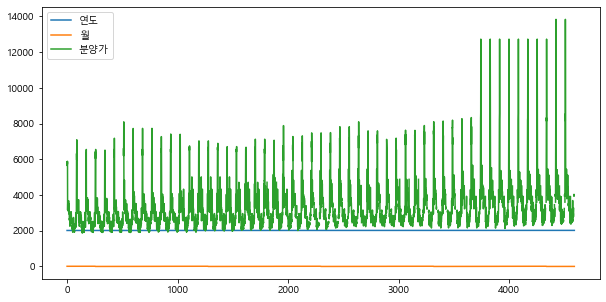

In [32]:
df.plot(figsize = (10, 5))

## seaborn은 matplotlib을 더 사용하기 쉽게 해주는 라이브러리
* [맵플롯립 공식문서 참조](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
* [시본 공식 문서 참조](https://seaborn.pydata.org)